# 유튜브 영상 댓글에 대한 긍정,부정 평가에 대한 보고서

## 노트

- 이 파일에 있는 것으로 모든 것을 정리하는 보고서를 만들어야 한다.
- 일단 처음 시작으로
    - 유튜브 영상에 대한 대중의 평가를 알고 싶어 댓글들을 크롤링 했었다.
    - 크롤링 하여 댓글들을 추출한다.
    - 이 댓글들을 openapi 프롬프트로 돌려서 댓글들에 대한 긍/부정평가를 했다.
    - 그 결과, 이 영상은 긍정 55: 부정 65로 전반적으로 부정적인 영상이 되었다.
    - 하지만 댓글들에 대한 워드 클라우드 시각화를 해보니
    - 영상에 대한 평가뿐만 아니라 선수, 경기쪽으로도 통합되어 긍/부정 평가를 하고 있었다.
    - 댓글의 긍/부정 평가로만 영상이 평가 받는것에 대한 모호한 부분이 있다.
- 중반
    - 이에 대해 긍/부정 평가를 세분화하여 선수, 경기, 영상 카테고리들로 나눴다.
    - 그리고 댓글들을 3개의 카테고리로 나눠 긍/부정 평가를 하였다.
    - 이후 확인해보니 선수에 대한 긍/부정 평가가 많았다.
    - 선수에 긍/부정 평가는 긍정 57: 부정 38로 전반적으로 긍정적인 댓글들이 많았다.
    - 이를 통해 이 영상은 선수에 대한 긍정적인 평가를 주로 하고 있다.
    - 마지막으로 이를 시각화해서 나타낸다면 선수에 대한 어떤 부분을 중점적으로 칭찬하고 있는지에 대해 나온다.
- 결과
    - 결국 이 영상에 대한 사람들의 긍/부정적인 평가는 전체적으로는 부정적인 면이 많다고 볼 수 있지만
    - 세분화해서 보게 된다면 긍/부정 평가가 비등한 부분이 있고 특히 선수카테고리는 긍정적인 평가가 더 많다는 것을 알 수 있다.
    - 사람들은 "키워드"에 대해서 선수에 대한 긍정적인 평가가 많았다.

- 제 생각은 서론 부분은 크롤링 하는 목적에 대해 설명하고 이에 따라 댓글을 크롤링 하는 과정을 보여주고 나온 데이터를 바탕을 하고
- 본론 부분에서는 본격적 데이터 분석(긍/부정 평가가 모든 카테고리가 통합되었다는 점, 카테고리 세분화하여 각각의 카테고리의 긍/부정평가를 실행, 그중 제일 많은 긍/부정 평가가 나온 카테고리를 중점으로 긍/부정평가에 대한 결과 보고, 이를 시각화하여 나타냄)을 나타내고
- 마지막 결론 부분은 본론 부분의 결과를 다시한번 말하며 결과에 대한 결론을 쓰면 될거 같다고 생각합니다.

## 보고서 (TEMPORARY)

### 제목: 유튜브 영상 댓글들에 대한 긍정/부정 평가

### 서론

- 목적: 유튜브영상의 댓글을 통해 악플을 찾는다.

- 기술:
    1. 웹 크롤링 기술을 통해 유튜브 영상에 있는 댓글중 일부를 크롤링한다.
    2. 영상의 일부 댓글을 추출하여 데이터 프레임으로 저장한다.
    3. 댓글텍스트 부분을 출력하여 OPENAI_API를 통해 댓글들의 긍/부정 평가를 하여 데이터프레임에 나타낸다.
    4. 댓글텍스트 부분을 출력하여 OPENAI_API를 통해 "선수","경기","영상"의 각각의 카테고리에 대한 댓글들의 긍/부정 평가를 실행하여 데이터프레임에 저장한다.

### 본론

- 댓글들의 긍/부정 평가를 실시한 결과입니다.

[유튜브 댓글의 긍/부정 평가](./using_openapi_comment_posneg.csv)

---

- 댓글들의 긍/부정 개수
    - 부정: 65
    - 긍정: 55

In [5]:
import pandas as pd

df_comment = pd.read_csv("./using_openapi_comment_posneg.csv")

In [8]:
comment_emotion = df_comment.긍부정.value_counts()

- 막대 그래프로 표현한 것입니다.

In [7]:
# 한글 글꼴 설정
import matplotlib.pyplot as plt
import numpy as np
font_path = 'C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'
font_name = plt.matplotlib.font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name

In [9]:
def comment_emotion_bar(comment_emotion):
    x = np.arange(2)

    positive_emo = comment_emotion["긍정"]
    negative_emo = comment_emotion["부정"]

    y_axis = [positive_emo, negative_emo]
    x_axis = ["긍정 댓글", "부정 댓글"]
    plt.bar(x,y_axis)
    plt.xticks(x, x_axis)
    plt.show

None


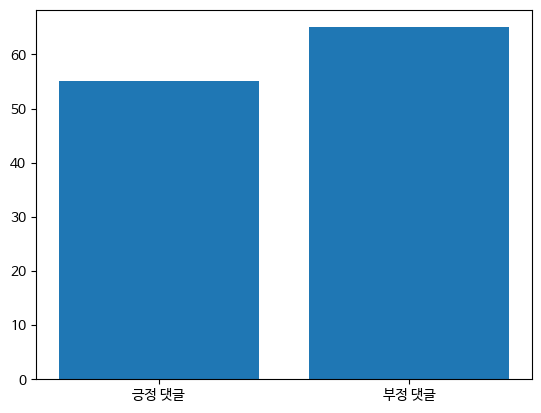

In [10]:
print(comment_emotion_bar(comment_emotion))

- 가설(결과):
    - 부정적인 평가가 긍정적인 평가보다 10개 더 많으니 "이 영상에 대해서 대체적으로 부정적이다"라는 결론이 도출하게 됩니다.

---

- 댓글의 명사, 형용사, 동사를 추출하여 어떤 키워드들이 댓글의 비중을 차지했는지 알아보겠습니다.

In [11]:
comment_list = df_comment['댓글텍스트'].to_list()
comment_string = ''.join(str(s) for s in comment_list)

In [14]:
# 명사 분류하기
from konlpy.tag import Okt
okt = Okt()

# Okt 명사 추출
def okt_noun_extractor(text):
    return okt.nouns(text)

comments_nouns = okt_noun_extractor(comment_string)

In [15]:
# 동사, 형용사 분류하기
from kiwipiepy import Kiwi
kiwi = Kiwi()

def kiwi_verb_adj_extractor(text):
    results = []
    result = kiwi.analyze(text)
    
    for token,pos,_,_ in result[0][0]:
        if len(token) != 1 and pos.startswith('VA') or pos.startswith('VV'):
            results.append(token)
    return results

comments_adj_verb_temp = kiwi_verb_adj_extractor(comment_string)
comment_adj_verb = list(map(lambda x : x + '다',comments_adj_verb_temp))

In [17]:
# 명사 워드 클라우드 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def wordcloud_noun(noun_text):
    cnt = len(noun_text)
    counts = Counter(noun_text)
    tags_noun = counts.most_common(cnt)
    wc = WordCloud(font_path='C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf', background_color='white', width=800, height=600)
    cloud_noun = wc.generate_from_frequencies(dict(tags_noun))
    
    plt.figure(figsize = (10, 8))
    plt.axis('off')
    plt.imshow(cloud_noun)
    plt.show()

In [18]:
# 동사, 형용사 워드 클라우드 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def wordcloud_verb_adj(verb_adj_text):
    cnt = len(verb_adj_text)
    counts = Counter(verb_adj_text)
    tags_verb_adj = counts.most_common(cnt)
    wc = WordCloud(font_path='C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf', background_color='white', width=800, height=600)
    cloud_verb_adj = wc.generate_from_frequencies(dict(tags_verb_adj))
    
    plt.figure(figsize = (10, 8))
    plt.axis('off')
    plt.imshow(cloud_verb_adj)
    plt.show()
    

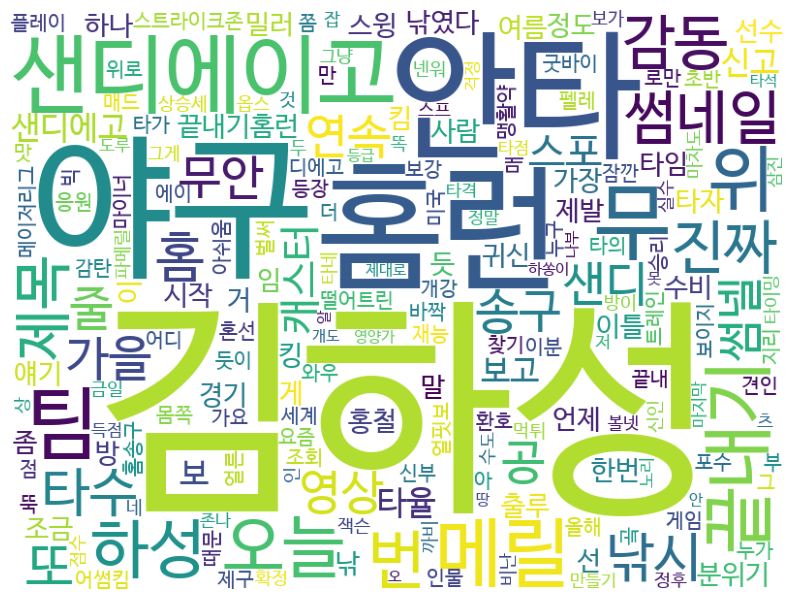

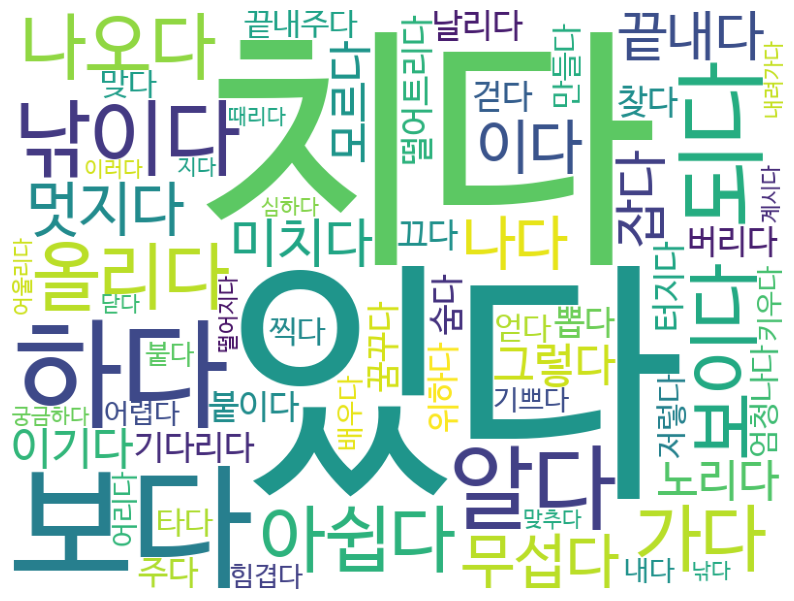

In [19]:
wc_noun = wordcloud_noun(comments_nouns)
wc_verb_adj = wordcloud_verb_adj(comment_adj_verb)

- 가설(결과):
    - 댓글들의 명사, 형용사, 동사들의 키워드를 살펴보니 "김하성","야구","홈런","치다","보다"등의 키워드들이 중점적으로 댓글들에 나온 것을 알 수 있습니다.
    - 이를 통해 알 수 있는 점은 영상의 댓글에는 영상에 관한 댓글보다 영상을 담고 있는 주제인 "야구","김하성"등에 비중이 더 큰 것을 알 수 있습니다.
    - 결론적으로 위에서 내렸던 결론인 "이 영상에 대해서 대체적으로 부정적이다"는 거짓이 될 수 있다는 점입니다.